In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load datasets

In [2]:
#Read training dataset CSV file from local
with open('train.csv') as train:
    train_data = pd.read_csv(train, delimiter=',')
train.close()

#Read testing dataset CSV file from local
with open('test.csv') as test:
    test_data = pd.read_csv(test, delimiter=',')
test.close()

#Read sampleSubmission dataset CSV file from local
with open('sampleSubmission.csv') as sampleSubmission:
    sampleSubmission_data = pd.read_csv(sampleSubmission, delimiter=',')
sampleSubmission.close()

### Check dimention of datasets

In [3]:
print(train_data.shape)
print(test_data.shape)
print(sampleSubmission_data.shape)

(15120, 56)
(565892, 55)
(565892, 2)


## Dataset information

### Data categories

Elevation - Elevation in meters

Aspect - Aspect in degrees azimuth

Slope - Slope in degrees

Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features

Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features

Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway

Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice

Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice

Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice

Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points

Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation

Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation

Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

In [4]:
print(train_data.columns.values)

['Id' 'Elevation' 'Aspect' 'Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology' 'Horizontal_Distance_To_Roadways'
 'Hillshade_9am' 'Hillshade_Noon' 'Hillshade_3pm'
 'Horizontal_Distance_To_Fire_Points' 'Wilderness_Area1'
 'Wilderness_Area2' 'Wilderness_Area3' 'Wilderness_Area4' 'Soil_Type1'
 'Soil_Type2' 'Soil_Type3' 'Soil_Type4' 'Soil_Type5' 'Soil_Type6'
 'Soil_Type7' 'Soil_Type8' 'Soil_Type9' 'Soil_Type10' 'Soil_Type11'
 'Soil_Type12' 'Soil_Type13' 'Soil_Type14' 'Soil_Type15' 'Soil_Type16'
 'Soil_Type17' 'Soil_Type18' 'Soil_Type19' 'Soil_Type20' 'Soil_Type21'
 'Soil_Type22' 'Soil_Type23' 'Soil_Type24' 'Soil_Type25' 'Soil_Type26'
 'Soil_Type27' 'Soil_Type28' 'Soil_Type29' 'Soil_Type30' 'Soil_Type31'
 'Soil_Type32' 'Soil_Type33' 'Soil_Type34' 'Soil_Type35' 'Soil_Type36'
 'Soil_Type37' 'Soil_Type38' 'Soil_Type39' 'Soil_Type40' 'Cover_Type']


` Indepedent variables (features)`

- Geographic information: 'Elevation', 'Aspect', 'Slope'

- Hydrological information: 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'

- Distance to roadway and fire point: 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points'

- Wilderness area information: 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'

- Soil information: 'Soil_Type 1-40'

` Dependent variables (outcomes)`

- Forest Cover Type designation: 'Cover_Type'

### Descriptive Statistics of training data

In [5]:
# Geographic information

train_data.iloc[:,0:4].describe()

,Id,Elevation,Aspect,Slope
count,15120.00000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587
std,4364.91237,417.678187,110.085801,8.453927
min,1.00000,1863.000000,0.000000,0.000000
25%,3780.75000,2376.000000,65.000000,10.000000
50%,7560.50000,2752.000000,126.000000,15.000000
75%,11340.25000,3104.000000,261.000000,22.000000
max,15120.00000,3849.000000,360.000000,52.000000


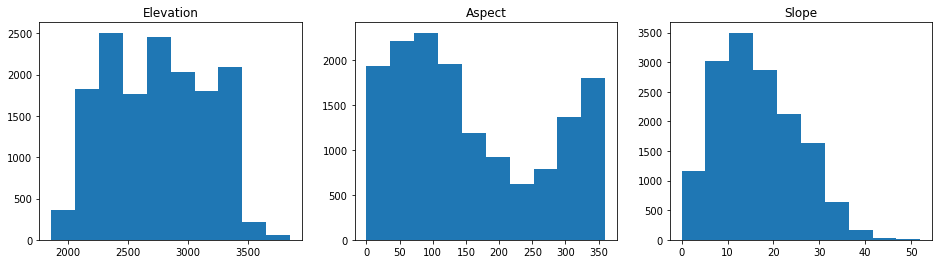

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
geograpy = ['Elevation', 'Aspect', 'Slope']

for i in range(1, 4):
    ax[i-1].hist(train_data.iloc[:,i])
    ax[i-1].set_title(geograpy[i-1])   

In [7]:
# Hydrological information

train_data.iloc[:,4:6].describe()

,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology
count,15120.000000,15120.000000
mean,227.195701,51.076521
std,210.075296,61.239406
min,0.000000,-146.000000
25%,67.000000,5.000000
50%,180.000000,32.000000
75%,330.000000,79.000000
max,1343.000000,554.000000


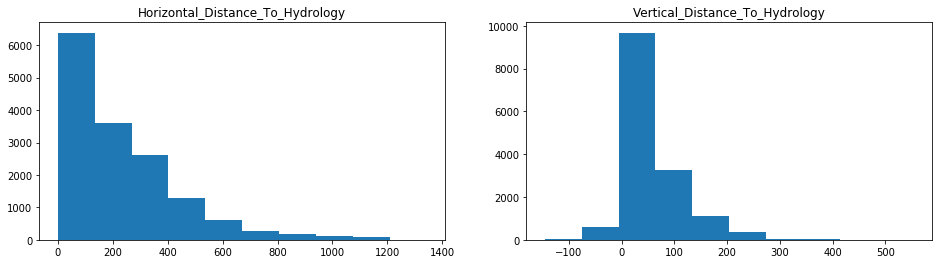

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
hydrology = ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']

for i in range(2):
    ax[i].hist(train_data.iloc[:,i+4])
    ax[i].set_title(hydrology[i])

In [9]:
# Distance to roadways and fire points

train_data.loc[:,['Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points']].describe()

,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000
mean,1714.023214,1511.147288
std,1325.066358,1099.936493
min,0.000000,0.000000
25%,764.000000,730.000000
50%,1316.000000,1256.000000
75%,2270.000000,1988.250000
max,6890.000000,6993.000000


Text(0.5, 1.0, 'Horizontal_Distance_To_Fire_Points')

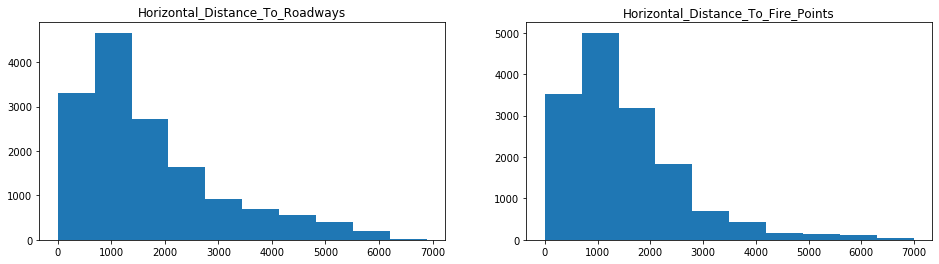

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))


ax[0].hist(train_data.loc[:,'Horizontal_Distance_To_Roadways'])
ax[0].set_title('Horizontal_Distance_To_Roadways')
ax[1].hist(train_data.loc[:,'Horizontal_Distance_To_Fire_Points'])
ax[1].set_title('Horizontal_Distance_To_Fire_Points')

In [11]:
# Hillshade information (0 to 255 index) 

train_data.iloc[:,7:10].describe()

,Hillshade_9am,Hillshade_Noon,Hillshade_3pm
count,15120.000000,15120.000000,15120.000000
mean,212.704299,218.965608,135.091997
std,30.561287,22.801966,45.895189
min,0.000000,99.000000,0.000000
25%,196.000000,207.000000,106.000000
50%,220.000000,223.000000,138.000000
75%,235.000000,235.000000,167.000000
max,254.000000,254.000000,248.000000


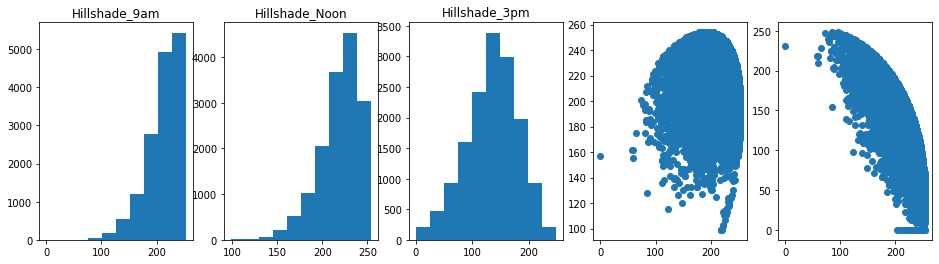

In [12]:
fig, ax = plt.subplots(1, 5, figsize=(16, 4))
hillshade = ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']

for i in range(3):
    ax[i].hist(train_data.iloc[:,i+7])
    ax[i].set_title(hillshade[i])
    
ax[3].scatter(train_data.loc[:,'Hillshade_9am'], train_data.loc[:,'Hillshade_Noon'])
ax[4].scatter(train_data.loc[:,'Hillshade_9am'], train_data.loc[:,'Hillshade_3pm'])

In [13]:
# Wilderness area information

train_data.iloc[:,11:15].describe()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
count,15120.000000,15120.000000,15120.000000,15120.000000
mean,0.237897,0.033003,0.419907,0.309193
std,0.425810,0.178649,0.493560,0.462176
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


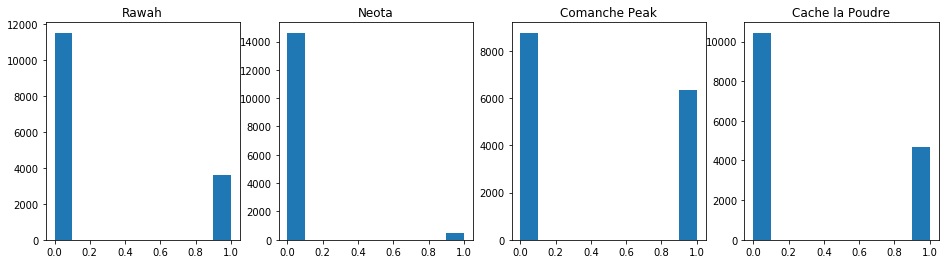

In [15]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
wilderness = ['Rawah', 'Neota', 'Comanche Peak', 'Cache la Poudre']

for i in range(4):
    ax[i].hist(train_data.iloc[:,i+11])
    ax[i].set_title(wilderness[i])

In [16]:
train_data.iloc[:,11:15].sum()

Wilderness_Area1    3597
Wilderness_Area2     499
Wilderness_Area3    6349
Wilderness_Area4    4675
dtype: int64

In [17]:
# Soil information (binary data)

train_data.iloc[:,15:56].describe()

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


1 Cathedral family - Rock outcrop complex, extremely stony.

2 Vanet - Ratake families complex, very stony.

3 Haploborolis - Rock outcrop complex, rubbly.

4 Ratake family - Rock outcrop complex, rubbly.

5 Vanet family - Rock outcrop complex complex, rubbly.

6 Vanet - Wetmore families - Rock outcrop complex, stony.

7 Gothic family.

8 Supervisor - Limber families complex.

9 Troutville family, very stony.

10 Bullwark - Catamount families - Rock outcrop complex, rubbly.

11 Bullwark - Catamount families - Rock land complex, rubbly.

12 Legault family - Rock land complex, stony.

13 Catamount family - Rock land - Bullwark family complex, rubbly.

14 Pachic Argiborolis - Aquolis complex.

15 unspecified in the USFS Soil and ELU Survey.

16 Cryaquolis - Cryoborolis complex.

17 Gateview family - Cryaquolis complex.

18 Rogert family, very stony.

19 Typic Cryaquolis - Borohemists complex.

20 Typic Cryaquepts - Typic Cryaquolls complex.

21 Typic Cryaquolls - Leighcan family, till substratum complex.

22 Leighcan family, till substratum, extremely bouldery.

23 Leighcan family, till substratum - Typic Cryaquolls complex.
24 Leighcan family, extremely stony.

25 Leighcan family, warm, extremely stony.

26 Granile - Catamount families complex, very stony.

27 Leighcan family, warm - Rock outcrop complex, extremely stony.

28 Leighcan family - Rock outcrop complex, extremely stony.

29 Como - Legault families complex, extremely stony.

30 Como family - Rock land - Legault family complex, extremely stony.

31 Leighcan - Catamount families complex, extremely stony.

32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.

33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.

34 Cryorthents - Rock land complex, extremely stony.

35 Cryumbrepts - Rock outcrop - Cryaquepts complex.

36 Bross family - Rock land - Cryumbrepts complex, extremely stony.

37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.

38 Leighcan - Moran families - Cryaquolls complex, extremely stony.

39 Moran family - Cryorthents - Leighcan family complex, extremely stony.

40 Moran family - Cryorthents - Rock land complex, extremely stony.

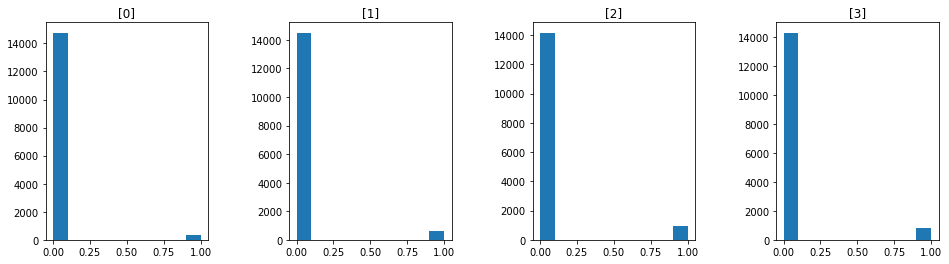

In [18]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(4):
    ax[i].hist(train_data.iloc[:,i+15])
    ax[i].set_title([i])

In [19]:
train_data.iloc[:,15:55].sum()

Soil_Type1      355
Soil_Type2      623
Soil_Type3      962
Soil_Type4      843
Soil_Type5      165
Soil_Type6      650
Soil_Type7        0
Soil_Type8        1
Soil_Type9       10
Soil_Type10    2142
Soil_Type11     406
Soil_Type12     227
Soil_Type13     476
Soil_Type14     169
Soil_Type15       0
Soil_Type16     114
Soil_Type17     612
Soil_Type18      60
Soil_Type19      46
Soil_Type20     139
Soil_Type21      16
Soil_Type22     345
Soil_Type23     757
Soil_Type24     257
Soil_Type25       1
Soil_Type26      54
Soil_Type27      15
Soil_Type28       9
Soil_Type29    1291
Soil_Type30     725
Soil_Type31     332
Soil_Type32     690
Soil_Type33     616
Soil_Type34      22
Soil_Type35     102
Soil_Type36      10
Soil_Type37      34
Soil_Type38     728
Soil_Type39     657
Soil_Type40     459
dtype: int64

In [20]:
train_labels = train_data.loc[:,['Id', 'Cover_Type']]
train_data = train_data.drop(['Cover_Type'], axis=1)
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0


In [21]:
train_labels.head()

,Id,Cover_Type
0,1,5
1,2,5
2,3,2
3,4,2
4,5,5


In [22]:
test_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [23]:
sampleSubmission_data.head()

,Id,Cover_Type
0,15121,1
1,15122,1
2,15123,1
3,15124,1
4,15125,1


In [24]:
test_labels = sampleSubmission_data
test_labels.head()

,Id,Cover_Type
0,15121,1
1,15122,1
2,15123,1
3,15124,1
4,15125,1


In [25]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(15120, 55)
(15120, 2)
(565892, 55)
(565892, 2)
